# Анализ вакансий DS и DA

**Описание проекта:** <br>

Исследование различий между вакансиями Data Scientist и Data Analyst.

**Цель исследования:** <br>

Показать чем различаются вакансии Data Scientist и Data Analyst.

**План работы:**

1) Загрузим данные и подготовим их к анализу.
2) Проведем исследовательский анализ данных.
3) Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.
4) Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
5) Определение типичного места работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
6) Расчет помесячной динамики количества вакансий для Аналитика данных и специалиста по Data Science. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
7) Формулирование выводов и рекомендаций.
8) Создание презентации.

**Описание данных:**

В нашем распоряжении два датасета о вакансиях представленных на сайте HH.ru c 2024-02-29 по 2024-05-07. Данные получены из API HH.ru.

`da.csv` - вакансии аналитиков данных<br>
`ds.csv` - вакансии датасаентистов

Столбцы в двух таблицах идентичны:

- `id` -  уникальный номер вакансии
- `name` - название вакансии
- `published_at` - дата публикации вакансии(Для каждой вакансии мы сохраням только первую дату публикации)
- `alternate_url` - ссылка на вакансию
- `type` - тип вакансии
- `employer` - работодатель
- `department` - подразделение работодателя
- `area` - регион вакансии
- `experience` - требуемый опыт работы
- `key_skills` - требуемые скиллы
- `schedule` - график работы
- `employment` - тип занятости
- `description` - подробное описание вакансии
- `salary_from` - зарплата от
- `salary_to` -  зарплата до

---

## Загрузим данные и подготовим их к анализу

---

In [1]:
import pandas as pd
from pymystem3 import Mystem
import numpy as np
from tqdm.notebook import tqdm
import re
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from collections import Counter

---

Посмотрим как выглядят данные

In [2]:
# приведем published_at сразу в формат даты
da = pd.read_csv('data/da.csv', parse_dates=['published_at'])
da.sample(5)

id                                               name  \
367   95776545  Аналитик моделирования и анализа данных в CRM-...   
343   95565056                                Senior Data Analyst   
1035  98252029  Системный аналитик (Аналитик хранилища данных ...   
1209  98648803                                       Data Analyst   
609   96978672                             Data Scientist/Analyst   

            published_at                   alternate_url      type  \
367  2024-05-06 10:28:17  https://hh.ru/vacancy/95776545  Открытая   
343  2024-03-26 17:32:33  https://hh.ru/vacancy/95565056  Открытая   
1035 2024-05-02 15:09:09  https://hh.ru/vacancy/98252029  Открытая   
1209 2024-05-09 10:13:30  https://hh.ru/vacancy/98648803  Открытая   
609  2024-05-06 09:33:33  https://hh.ru/vacancy/96978672  Открытая   

                  employer                 department         area  \
367         Банк ВТБ (ПАО)  ПАО ВТБ, Розничный бизнес       Москва   
343   «UZUM TECHNOLOGIES».                        NaN       Москва   
1035           СберСпасибо                        NaN       Москва   
1209             Mayflower                        NaN      Тбилиси   
609       RapidSeedbox ltd                        NaN  Новосибирск   

              experience                                         key_skills  \
367   От 1 года до 3 лет                                                 []   
343   Middle (3-6 years)     ['Data Analysis', 'Power BI', 'SQL', 'Python']   
1035       От 3 до 6 лет  ['SQL', 'Аналитическое мышление', 'Анализ данн...   
1209       От 3 до 6 лет  ['SQL', 'ORACLE', 'Английский язык', 'Data Ana...   
609        От 3 до 6 лет  ['Google Analytics', 'Data Analysis', 'Python'...   

              schedule        employment  \
367        Полный день  Полная занятость   
343        Полный день  Полная занятость   
1035       Полный день  Полная занятость   
1209       Полный день  Полная занятость   
609   Удаленная работа  Полная занятость   

                                            description  salary_from  \
367   Обязанности:    анализ и обработка больших объ...          NaN   
343   uzum — это новая уникальная компания в узбекис...          NaN   
1035  Мы — СберСпасибо, программа лояльности СберБан...          NaN   
1209  Work format: full-time, officeLocation: Cyprus...          NaN   
609   Data Scientist/Analyst - RemoteOur core values...       1000.0   

      salary_to  
367         NaN  
343         NaN  
1035        NaN  
1209        NaN  
609      1500.0

In [3]:
# приведем published_at сразу в формат даты
ds = pd.read_csv('data/ds.csv', parse_dates=['published_at'])
ds.sample(5)

id                                               name  \
148  94229765                              Junior Data Scientist   
11   88623848                                     Data Scientist   
520  96833859                   Data Scientist, Контент и товары   
482  96522089  Аналитик по машинному обучению / ML-аналитик /...   
543  97038002                             Team-Lead Data Science   

           published_at                   alternate_url      type  \
148 2024-03-04 19:10:43  https://hh.ru/vacancy/94229765  Открытая   
11  2024-03-23 10:44:56  https://hh.ru/vacancy/88623848  Открытая   
520 2024-04-12 16:59:24  https://hh.ru/vacancy/96833859  Открытая   
482 2024-05-06 10:53:17  https://hh.ru/vacancy/96522089  Открытая   
543 2024-04-15 17:14:49  https://hh.ru/vacancy/97038002  Открытая   

                                        employer  \
148                            Концерн Созвездие   
11   Специальный Технологический Центр (ООО СТЦ)   
520                                         Ozon   
482                             Московская Биржа   
543                                       Datana   

                         department             area           experience  \
148                             NaN          Воронеж  Junior+ (1-3 years)   
11                              NaN  Санкт-Петербург  Junior+ (1-3 years)   
520  Ozon Информационные технологии           Москва   От 1 года до 3 лет   
482                             NaN           Москва   От 1 года до 3 лет   
543                             NaN           Москва        От 3 до 6 лет   

                                            key_skills          schedule  \
148  ['искусственный интеллект', 'C++', 'C/C++', 'L...       Полный день   
11   ['ffmpeg', 'soxi', 'Kaldi', 'TensorFlow', 'lib...       Полный день   
520                              ['Python', 'PyTorch']       Полный день   
482                                  ['Python', 'SQL']  Удаленная работа   
543                                                 []       Полный день   

           employment                                        description  \
148  Полная занятость  ао &quot;концерн &quot;созвездие&quot; приглаш...   
11   Полная занятость  специальный технологический центр (ооо стц) ра...   
520  Полная занятость  Ozon marketplace – одно из самых перспективных...   
482  Полная занятость  В 2022 году Московской бирже исполнилось 30 ле...   
543  Полная занятость  Мы занимаемся разработкой цифровых решений для...   

     salary_from  salary_to  
148          NaN        NaN  
11      200000.0        NaN  
520          NaN        NaN  
482          NaN        NaN  
543     300000.0   350000.0

---

Добавим флаговую переменную(которая будет принимать два значения "da" или "ds") и объеденим данные, чтобы на этапе обработке было удобнее с ними работать

In [4]:
# Создаем переменные
da['name_type'] = 'da'
ds['name_type'] = 'ds'

# объеденяем таблицы
vacancies = pd.concat((da, ds))
start_data_size = vacancies.shape[0]

---

Посмотрим общую информацию о датасете

In [5]:
vacancies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2013 entries, 0 to 801
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             2013 non-null   int64         
 1   name           2013 non-null   object        
 2   published_at   2013 non-null   datetime64[ns]
 3   alternate_url  2013 non-null   object        
 4   type           2013 non-null   object        
 5   employer       2013 non-null   object        
 6   department     621 non-null    object        
 7   area           2013 non-null   object        
 8   experience     2013 non-null   object        
 9   key_skills     2013 non-null   object        
 10  schedule       2013 non-null   object        
 11  employment     2013 non-null   object        
 12  description    2013 non-null   object        
 13  salary_from    291 non-null    float64       
 14  salary_to      199 non-null    float64       
 15  name_type      2013 non-nul

Видно что работодатели зачастую не вносят информацию о зарплате. 

---

Мы хотим сравнить две когорты аналитиков и датасаентистов. В наших данных есть смежные вакансии - Аналитик данных/Data Scientist, так как непонятно к какой когорте их отнести, давайте посмотрим сколько этих данных в нашем датасете и удалим их.

In [6]:
grid = vacancies.name.str.lower().str.contains(r'data scien') \
    & (vacancies.name.str.lower().str.contains(r'analyst') \
    | vacancies.name.str.lower().str.contains(r'аналитик'))
vacancies[grid].sort_values(by='id')

id                                             name  \
56    91765959                   Дата аналитик (Data Scientist)   
63    91765959                   Дата аналитик (Data Scientist)   
64    91765960                   Дата аналитик (Data Scientist)   
57    91765960                   Дата аналитик (Data Scientist)   
70    92068025  Аналитик данных (data scientist, data engineer)   
...        ...                                              ...   
1162  98551181       Аналитик данных / Data Scientist (middle+)   
774   98573757                   Аналитик данных/Data Scientist   
1173  98573757                   Аналитик данных/Data Scientist   
1183  98592181            Аналитик данных/Junior DATA SCIENTIST   
775   98592181            Аналитик данных/Junior DATA SCIENTIST   

            published_at                   alternate_url      type  \
56   2024-04-04 10:10:44  https://hh.ru/vacancy/91765959  Открытая   
63   2024-04-04 10:10:44  https://hh.ru/vacancy/91765959  Открытая   
64   2024-03-28 06:25:29  https://hh.ru/vacancy/91765960  Открытая   
57   2024-03-28 06:25:29  https://hh.ru/vacancy/91765960  Открытая   
70   2024-03-12 12:42:01  https://hh.ru/vacancy/92068025  Открытая   
...                  ...                             ...       ...   
1162 2024-05-07 14:36:58  https://hh.ru/vacancy/98551181  Открытая   
774  2024-05-07 20:09:28  https://hh.ru/vacancy/98573757  Открытая   
1173 2024-05-07 20:09:28  https://hh.ru/vacancy/98573757  Открытая   
1183 2024-05-08 09:12:01  https://hh.ru/vacancy/98592181  Открытая   
775  2024-05-08 09:12:01  https://hh.ru/vacancy/98592181  Открытая   

                                               employer department  \
56                          Центр финансовых технологий        NaN   
63                          Центр финансовых технологий        NaN   
64                          Центр финансовых технологий        NaN   
57                          Центр финансовых технологий        NaN   
70    Федеральное государственное автономное учрежде...        NaN   
...                                                 ...        ...   
1162                             СИБУР, Группа компаний      Сибур   
774                                   Консорциум Кодекс        NaN   
1173                                  Консорциум Кодекс        NaN   
1183                                 БиАйЭй-Технолоджиз        NaN   
775                                  БиАйЭй-Технолоджиз        NaN   

                 area           experience  \
56    Санкт-Петербург  Junior+ (1-3 years)   
63    Санкт-Петербург  Junior+ (1-3 years)   
64        Новосибирск  Junior+ (1-3 years)   
57        Новосибирск  Junior+ (1-3 years)   
70             Москва   Middle (3-6 years)   
...               ...                  ...   
1162           Москва        От 3 до 6 лет   
774   Санкт-Петербург   От 1 года до 3 лет   
1173  Санкт-Петербург   От 1 года до 3 лет   
1183           Москва   От 1 года до 3 лет   
775            Москва   От 1 года до 3 лет   

                                             key_skills     schedule  \
56                                           ['Pandas']  Полный день   
63                                           ['Pandas']  Полный день   
64                                           ['Pandas']  Полный день   
57                                           ['Pandas']  Полный день   
70    ['Документация', 'Создание моделей', 'Оформлен...  Полный день   
...                                                 ...          ...   
1162     ['Python', 'SQL', 'Математическая статистика']  Полный день   
774   ['Machine Learning', 'Data Science', 'SQL', 'P...  Полный день   
1173  ['Machine Learning', 'Data Science', 'SQL', 'P...  Полный день   
1183                                                 []  Полный день   
775                                                  []  Полный день   

            employment                                        description  \
56    Полная занятость  пригла

У нас 115 таких наблюдения, давайте их удалим.

In [7]:
vacancies = vacancies[~grid].sort_values(by='id')

In [8]:
print(f'Удалили {1 - vacancies.shape[0] / start_data_size:.2%} данных')

Удалили 5.71% данных


---

Создадим новую переменную `published_date`

In [9]:
vacancies['published_date'] = vacancies.published_at.dt.date

---

Посмотрим наличие дубликатов

In [10]:
n_dupl = vacancies.duplicated(
    subset='id'
).sum()
print(f'Количество дубликатов - {n_dupl}')

Количество дубликатов - 1


Посмотрим на дубликаты

In [11]:
vacancies[
    vacancies.duplicated(
        subset='id',
        keep=False
    )].sort_values(by=['name', 'employer', 'published_date'])

id                             name        published_at  \
434  96061431                   Data Scientist 2024-04-27 10:07:00   
420  96061431  Аналитик данных (Голос клиента) 2024-04-27 10:07:00   

                      alternate_url      type employer          department  \
434  https://hh.ru/vacancy/96061431  Открытая     СБЕР  Сбер для экспертов   
420  https://hh.ru/vacancy/96061431  Открытая     СБЕР  Сбер для экспертов   

       area          experience key_skills     schedule        employment  \
434  Москва  Middle (3-6 years)         []  Полный день  Полная занятость   
420  Москва       От 3 до 6 лет         []  Полный день  Полная занятость   

                                           description  salary_from  \
434  корпоративно-инвестиционный блок отвечает за р...          NaN   
420  Корпоративно-инвестиционный блок отвечает за р...          NaN   

     salary_to name_type published_date  
434        NaN        ds     2024-04-27  
420        NaN        da     2024-04-27

Это одна и та же вакансия, судя по всему она сначала называлась Аналитик данных, а потом ее переименовали в Data Scientist, cтоит удалить эти наблюдения потому что не понятно к какой когорте их отнести.

In [12]:
vacancies.drop_duplicates(subset='id', keep=False, inplace=True)

In [13]:
print(f'Удалили {1 - vacancies.shape[0] / start_data_size:.2%} данных')

Удалили 5.81% данных


Проверим есть ли у нас одинаковые вакансии, но с разным id

In [14]:
vacancies[
    vacancies.duplicated(
        subset=['name', 'published_date', 'employer', 'department', 'area', 'description'],
        keep=False
    )].sort_values(by=['name', 'employer', 'published_date'])

id             name        published_at  \
945  97929624  Аналитик данных 2024-04-25 17:24:21   
946  97929739  Аналитик данных 2024-04-25 17:27:28   

                      alternate_url      type  \
945  https://hh.ru/vacancy/97929624  Открытая   
946  https://hh.ru/vacancy/97929739  Открытая   

                                        employer department    area  \
945  ГКУ Центр занятости населения города Москвы        NaN  Москва   
946  ГКУ Центр занятости населения города Москвы        NaN  Москва   

             experience key_skills     schedule        employment  \
945  От 1 года до 3 лет         []  Полный день  Полная занятость   
946  От 1 года до 3 лет         []  Полный день  Полная занятость   

                                           description  salary_from  \
945  Один из ключевых партнёров Центра занятости на...     150000.0   
946  Один из ключевых партнёров Центра занятости на...          NaN   

     salary_to name_type published_date  
945        NaN        da     2024-04-25  
946        NaN        da     2024-04-25

Удалим дубликат

In [15]:
vacancies.drop_duplicates(
    subset=['name', 'published_date', 'employer', 'department', 'area', 'description'],
    keep=False, inplace=True
)

In [16]:
print(f'Удалили {1 - vacancies.shape[0] / start_data_size:.2%} данных')

Удалили 5.91% данных


---

Посмотрим какие названия вакансий у нас в датасете

In [17]:
vacancies.name.value_counts()[:10]

name
Аналитик данных            198
Data Scientist             114
Data Analyst                79
Senior Data Scientist       24
Data scientist              20
Junior Data Scientist       19
Ведущий аналитик данных     17
Middle Data Scientist       15
Senior Data Analyst         13
Data analyst                12
Name: count, dtype: int64

In [18]:
vacancies.name.value_counts()[-10:]

name
Data Analyst (Customer Communication)                              1
Junior Data Scientist в SberData                                   1
Middle Data Scientist в Департамент "Занять и сберегать"           1
Data Analyst в Департамент данных и рекомендательных систем В2С    1
Middle/Senior Data Scientist в Блок B2C                            1
Data Scientist (LLM/ NlP) в Блок B2C                               1
Data analyst (Middle)                                              1
Системный аналитик данных                                          1
Team Lead Data Scientist в команду SberCampaigning                 1
Product Data Analyst                                               1
Name: count, dtype: int64

Все просмотреть нет возможности, но тут вроде порядок.

---

Посмотрим минимальные и максимальные даты

In [19]:
print(f'Минимальная дата - {vacancies.published_at.min().strftime("%Y-%m-%d %X")}')
print(f'Максимальная дата - {vacancies.published_at.max().strftime("%Y-%m-%d %X")}')

Минимальная дата - 2024-02-29 15:01:35
Максимальная дата - 2024-05-10 08:01:23


---

Посмотрим какие регионы присутствуют в нашем датасете

In [20]:
vacancies[vacancies.name_type == 'da'].area.value_counts()[:25]

area
Москва             778
Санкт-Петербург     96
Ташкент             26
Екатеринбург        25
Алматы              23
Нижний Новгород     17
Минск               16
Новосибирск         15
Владивосток         13
Казань              12
Краснодар           12
Сербия              10
Астана               9
Ростов-на-Дону       7
Тбилиси              7
Бишкек               5
Красноярск           4
Владимир             4
Самара               4
Воронеж              4
Саратов              4
Челябинск            4
Тюмень               4
Пермь                3
Ижевск               3
Name: count, dtype: int64

---

Посмотрим значения в переменной `experience`

In [21]:
vacancies.experience.value_counts()

experience
От 1 года до 3 лет       785
От 3 до 6 лет            537
Junior+ (1-3 years)      207
Middle (3-6 years)       195
Нет опыта                115
Более 6 лет               25
Junior (no experince)     18
Senior (6+ years)         12
Name: count, dtype: int64

Привидем значения к общему виду

In [22]:
def calc_experience(value):
    if value[0] < 'А':
        return value
    expirience = re.findall(r'\d', value)
    if not expirience:
        return 'Junior (no experince)'
    if expirience[0] == '6':
        return 'Senior (6+ years)'
    if expirience[0] == '1':
        return 'Junior+ (1-3 years)'
    if expirience[0] == '3':
        return 'Middle (3-6 years)'   

In [23]:
vacancies.experience = vacancies.experience.map(calc_experience)

---

---

Посмотрим какие значения принимает переменная `schedule`(график работы)

In [24]:
vacancies.schedule.value_counts()

schedule
Полный день         1489
Удаленная работа     330
Гибкий график         64
Сменный график        10
Вахтовый метод         1
Name: count, dtype: int64

Интересно посмотреть на вакансию с вахтовым методом:)

In [25]:
vacancies[vacancies.schedule == 'Вахтовый метод']

id                                           name  \
695  97189840  Аналитик по работе с базами данных (MS Excel)   

           published_at                   alternate_url      type employer  \
695 2024-04-17 09:37:54  https://hh.ru/vacancy/97189840  Открытая      РХИ   

    department       area           experience  \
695        NaN  Свободный  Junior+ (1-3 years)   

                                            key_skills        schedule  \
695  ['MS Excel', 'Управленческая отчетность', 'Раб...  Вахтовый метод   

           employment                                        description  \
695  Полная занятость  Уважаемые соискатели, Мы в поиске сотрудника н...   

     salary_from  salary_to name_type published_date  
695          NaN        NaN        da     2024-04-17

---

Посмотрим какие значения принимает переменная `employment`

In [26]:
vacancies.employment.value_counts()

employment
Полная занятость       1844
Стажировка               27
Проектная работа         16
Частичная занятость       7
Name: count, dtype: int64

---

In [27]:
vacancies.reset_index(drop=True, inplace=True)

### Создадим необходимые переменные

Проведем лемматизацию описания и результат сохраним в новый столбец `description_lemmatized`

In [28]:
def lemmatize_corpus(description: pd.Series) -> pd.Series:
    texts = ' br '.join(description.to_list())
    
    print('Запуск лематизации')
    stem = Mystem()
    text_lemm = stem.lemmatize(texts)
    
    data = []
    temp = []
    for word in tqdm(text_lemm):
        if word == 'br':
            data.append(' '.join([word for word in temp if word.isalpha()]))
            temp = []
        else:
            temp.append(word)
    data.append(' '.join([word for word in temp if word.isalpha()]))
    data = pd.Series(data, name='description_lemmatized')
    assert description.shape[0] == data.shape[0]
    return data

In [29]:
vacancies['description_lemmatized'] = lemmatize_corpus(vacancies.description)

Запуск лематизации


  0%|          | 0/986791 [00:00<?, ?it/s]

---

Создадим переменную `skills` - значение переменной будет строка содержащая скиллы вакансии через пробел.

Сначала найдем самые популярные скиллы из столбца `key_skills`

In [30]:
vacancies['skills_from_key_skills'] = (
    vacancies[
    'key_skills'].map(
        lambda x: ', '.join(set([skill[1:-1] for skill in x[1:-1].lower().split(', ')]))))

skills_data = vacancies['skills_from_key_skills'].to_list()
counter = {}
for sequence in skills_data:
    skills = set(sequence.split(', '))
    for skill in skills:
        counter[skill] = counter.get(skill, 0) + 1
counter = {k: v for k, v in counter.items() if v >= 5}
counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))
del counter['']
del counter['it']

SKILLS = set(counter.keys())

def calc_skills_from_description(value):
    res = []
    for word in value.split():
        word = word.lower()
        if word in SKILLS:
            res.append(word)
    return ', '.join(set(res))

vacancies['skills_from_description'] = vacancies['description_lemmatized'].map(calc_skills_from_description)

def calc_skills(row):
    if row['skills_from_description'] == '':
        return row['skills_from_key_skills']
    if row['skills_from_key_skills'] == '':
        return row['skills_from_description']
    return ', '.join(set(row['skills_from_description'].split(', ') + row['skills_from_key_skills'].split(', ')))

vacancies['skills'] = vacancies.apply(calc_skills, axis=1)

---

Создадим переменную `salary_cat`, которая будет содержать категорию заработной платы.

In [31]:
def calc_salary_bin(row):
    if row.isna()['salary_to'] and row.isna()['salary_from']:
        return 'ЗП не указана'
    if not row.isna()['salary_to']:
        if row['salary_to'] > 3e5:
            return 'Больше 300 тысяч'
        if row['salary_to'] > 2e5:
            return 'От 200 тысяч до 300 тысяч'
        if row['salary_to'] > 1e5:
            return 'От 100 тысяч до 200 тысяч'
        else:
            return 'Меньше 100 тысяч'
    if not row.isna()['salary_from']:
        if row['salary_from'] >= 3e5:
            return 'Больше 300 тысяч'
        if row['salary_from'] >= 2e5:
            return 'От 200 тысяч до 300 тысяч'
        if row['salary_from'] >= 1e5:
            return 'От 100 тысяч до 200 тысяч'
        else:
            return 'Меньше 100 тысяч'

In [32]:
vacancies['salary_bin'] = vacancies.apply(calc_salary_bin, axis=1)

---

Создадим переменную `salary_num`, которая будет содержать зарплату в числовом формате или nan если зарплата не указана.

In [33]:
def calc_salary_num(row):
    if not row.isna()['salary_to'] and not row.isna()['salary_from']:
        return (row['salary_to'] + row['salary_from']) / 2
    if not row.isna()['salary_to']:
        return row['salary_to']
    if not row.isna()['salary_from']:
        return row['salary_from']

In [34]:
vacancies['salary_num'] = vacancies.apply(calc_salary_num, axis=1)

---

## Исследовательский анализ данных

---

Общее количество вакансий - 1894


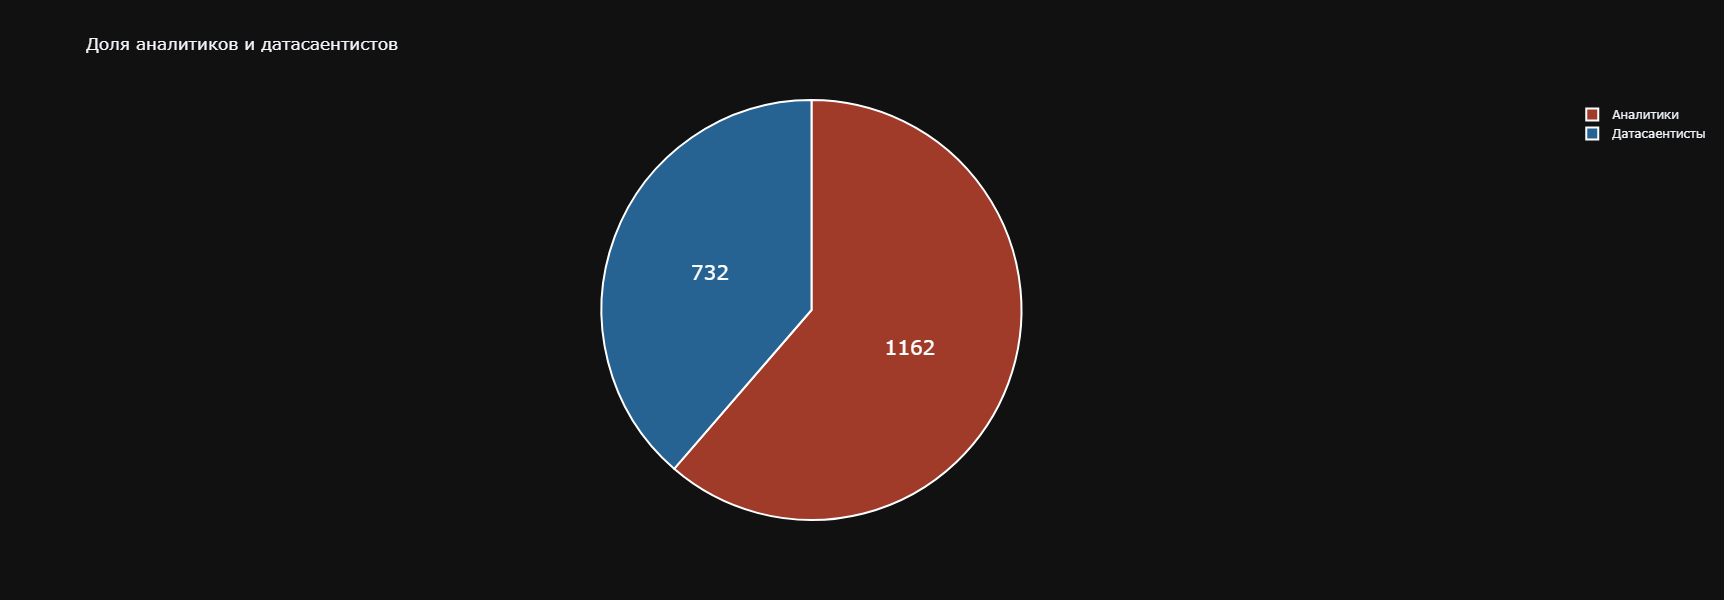

In [35]:
df = vacancies.name_type.value_counts().reset_index()
print(f'Общее количество вакансий - {vacancies.shape[0]}')
colors = ['#A03B2A', '#266292']
fig = go.Figure(data=[go.Pie(labels=['Аналитики','Датасаентисты'],
                             values=df['count'])])
fig.update_layout(
        height=600, width=600, 
        title_text='Доля аналитиков и датасаентистов', 
        showlegend=True,
        template="plotly_dark",       
    )
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))
fig.show()

Вакансий аналитиков в два раза больше вакансий датаса

---

Посмотрим самые частовстречаемые названия вакансий для аналитиков и датасаентистов

In [36]:
def plot_discrete(name_type: str, 
                  top_n: int,
                  feature,
                  *,
                  rus_feature,
                  title_text, 
                  data=vacancies, 
                  color='#FF563A',
                  width=800,
                  height=800,
                  top=True
                 ) -> None:
    top_name = (
        data[data.name_type == name_type]
        [feature].value_counts()[:top_n]
        .reset_index()
        .sort_values(by='count')
        .rename(columns={'count': 'Количество вакансий', feature: rus_feature})
    )
    
    fig = px.bar(top_name, 'Количество вакансий', rus_feature, orientation='h')
    
    fig.update_traces(marker_color=color, marker_line_color='#FFFFFF',
                      marker_line_width=1.5, opacity=0.6)
    
    fig.update_layout(
        height=height, width=width, 
        title_text=title_text, 
        showlegend=False,
        template="plotly_dark",       
    )
    fig.show()

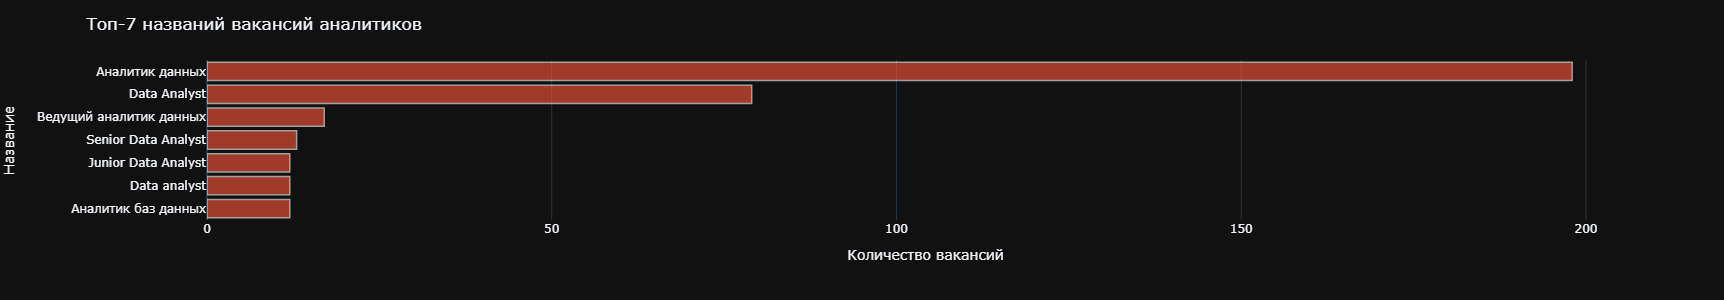

In [37]:
plot_discrete(
    'da', 7, 'name', 
    rus_feature='Название', 
    title_text='Топ-7 названий вакансий аналитиков',
    height=300
)

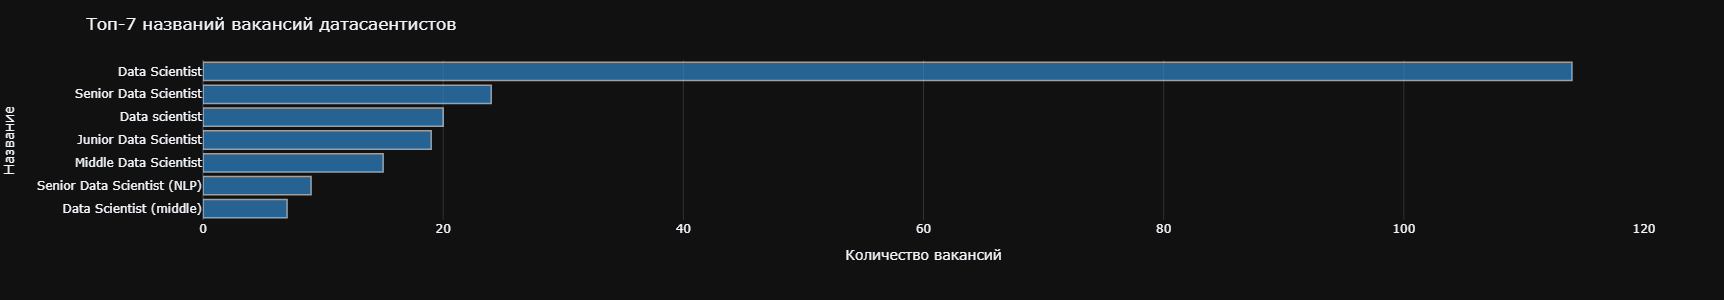

In [38]:
plot_discrete(
    'ds', 7, 'name', 
    rus_feature='Название', 
    title_text='Топ-7 названий вакансий датасаентистов',
    height=300,
    color='#3498E8'
)

Как видно из данных, наиболее востребованными на рынке труда являются позиции "Аналитик данных", "Data Analyst" и "Data Scientist". Это говорит о том, что соискателям, вероятно, не следует усложнять название своей специализации при поиске работы. Простота и понятность названия профессии могут оказаться ключевыми в успешном трудоустройстве.

---

Посмотрим на количество опубликованных вакансий в динамике

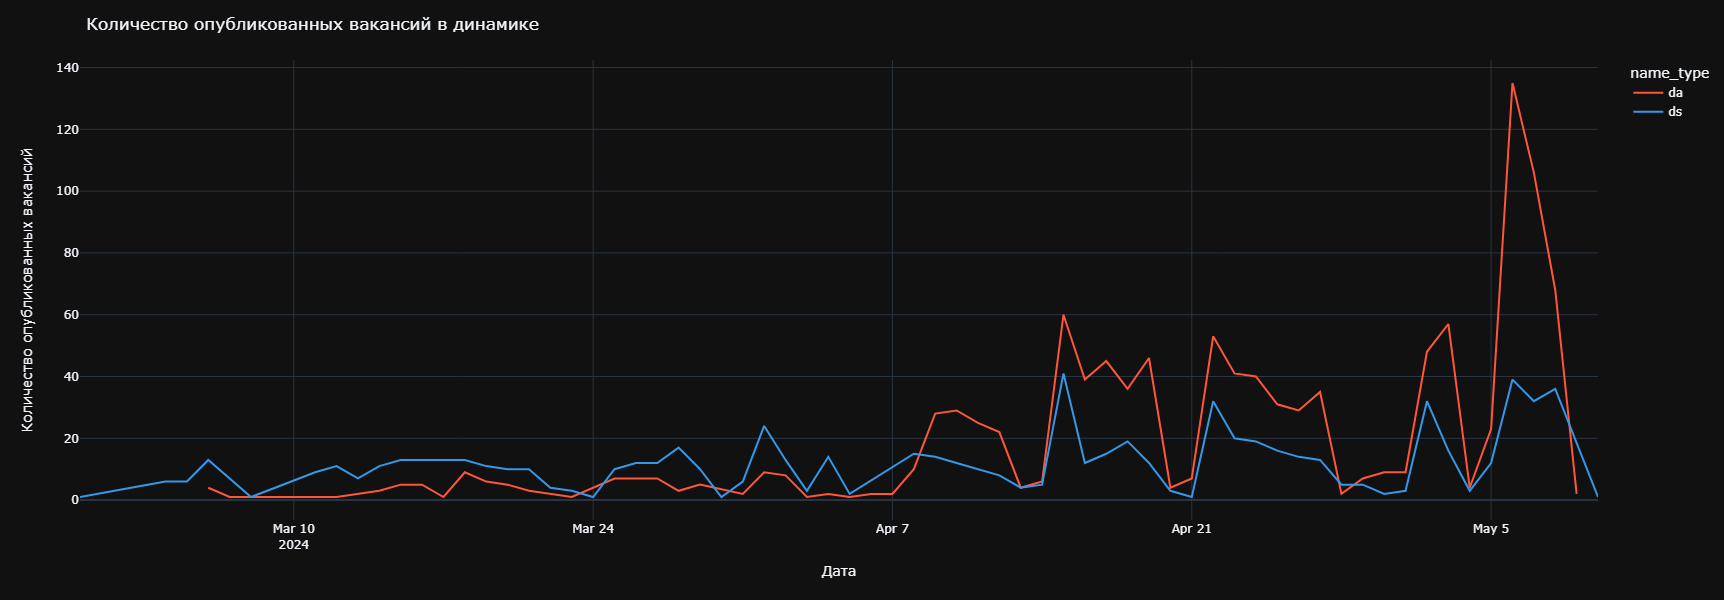

In [39]:
df = (
    vacancies.groupby(['name_type', 'published_date'])
    .name.count()
    .reset_index()
    .rename(columns={'name': 'Количество опубликованных вакансий',
                     'published_date': 'Дата'})
)
fig = px.line(df, x='Дата', 
              y='Количество опубликованных вакансий', 
              color='name_type'
             )
fig.data[0].line.color = '#FF563A'
fig.data[1].line.color = '#3498E8'
fig.update_layout(
        height=600, width=1200, 
        title_text=f"Количество опубликованных вакансий в динамике",
        showlegend=True,
        template="plotly_dark",
        
    )
fig.show()

Анализируя график мы можем увидеть, что объем вакансий, опубликованных в период с 29 февраля по 8 мая 2024 года, показывает значительное увеличение в апреле по сравнению с мартом. Это может свидетельствовать о повышенной активности на рынке труда в апрельский период, что, в свою очередь, открывает больше возможностей для соискателей и указывает на рост потребности компаний в новых сотрудниках. 

---

Посмотрим на работодателей которые опубликовали больше всего вакансий

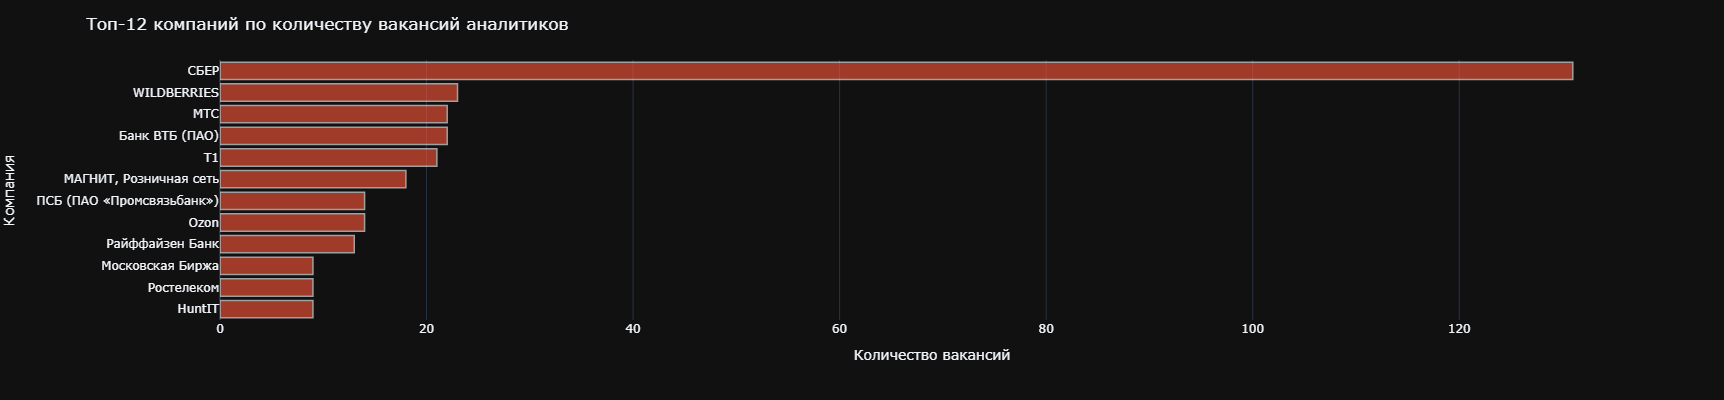

In [40]:
plot_discrete(
    'da', 12, 'employer',
    rus_feature='Компания',
    title_text='Топ-12 компаний по количеству вакансий аналитиков',
    height=400
)

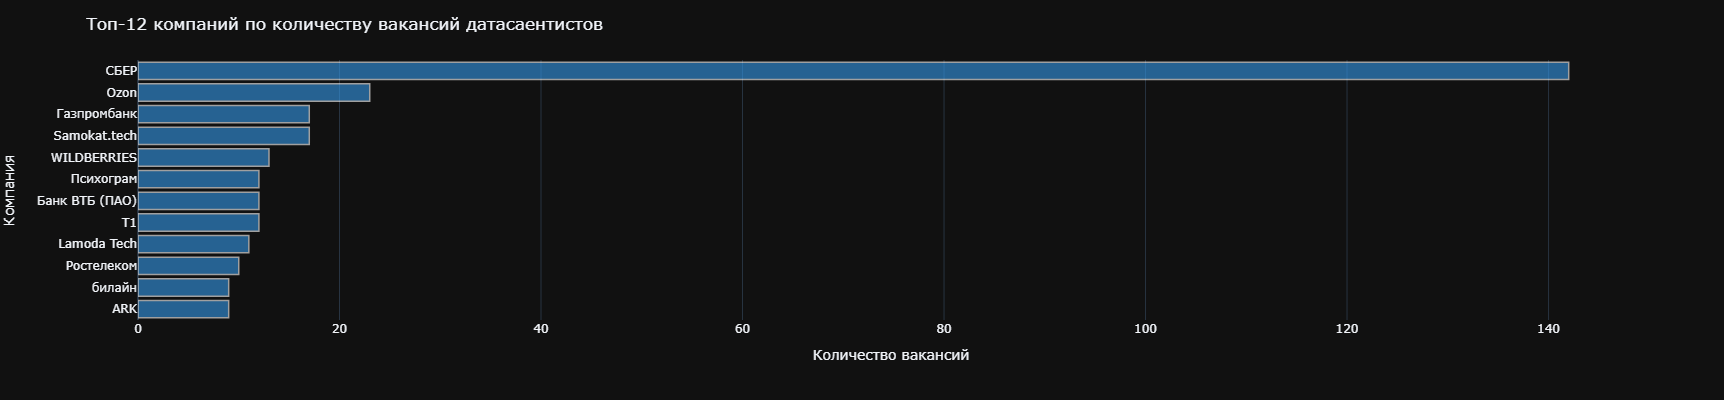

In [41]:
plot_discrete(
    'ds', 12, 'employer',
    rus_feature='Компания',
    title_text='Топ-12 компаний по количеству вакансий датасаентистов',
    color='#3498E8',
    height=400
)

На текущем рынке труда СБЕР выделяется как неоспоримый лидер по количеству предложений о работе. Интересно отметить, что в таких компаниях, как WILDBERRIES, ВТБ и МТС, наблюдается повышенный спрос на аналитиков данных по сравнению с датасаентистами. В то же время, в компаниях OZON, Газпромбанк и Samokat.tech, наоборот, профессия датасаентиста пользуется большей популярностью, чем аналитика данных. Это подчеркивает разнообразие потребностей в специалистах по обработке данных на рынке, где каждая компания стремится найти подходящего специалиста, отвечающего её уникальным требованиям.

---

Посмотрим как распределены вакансии по районам

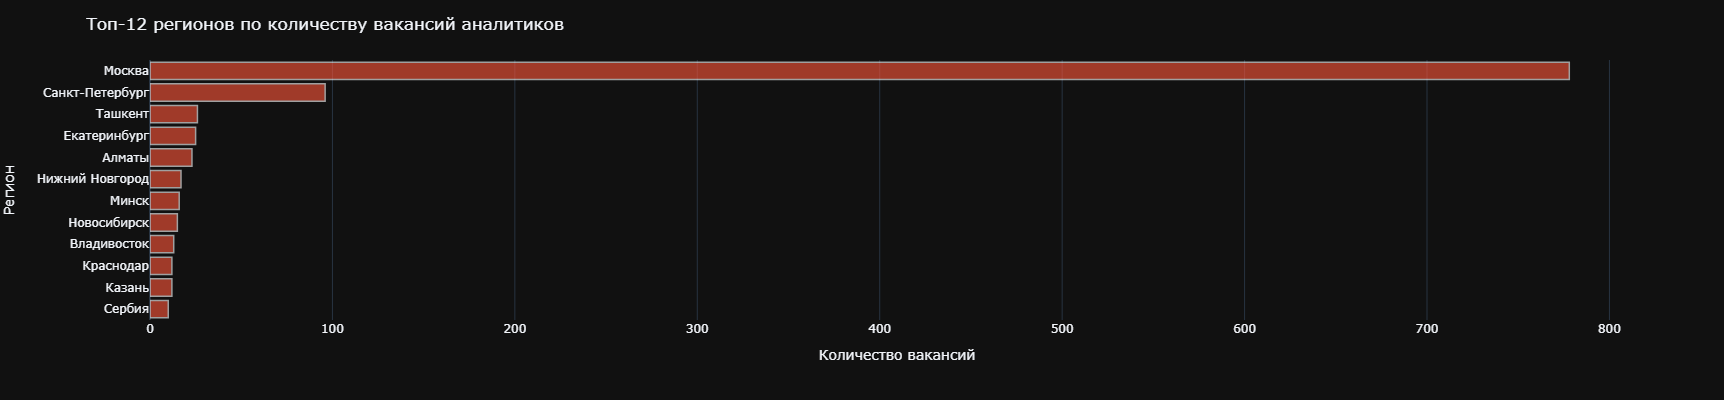

In [42]:
plot_discrete(
    'da', 12, 'area',
    rus_feature='Регион',
    title_text='Топ-12 регионов по количеству вакансий аналитиков',
    height=400
)

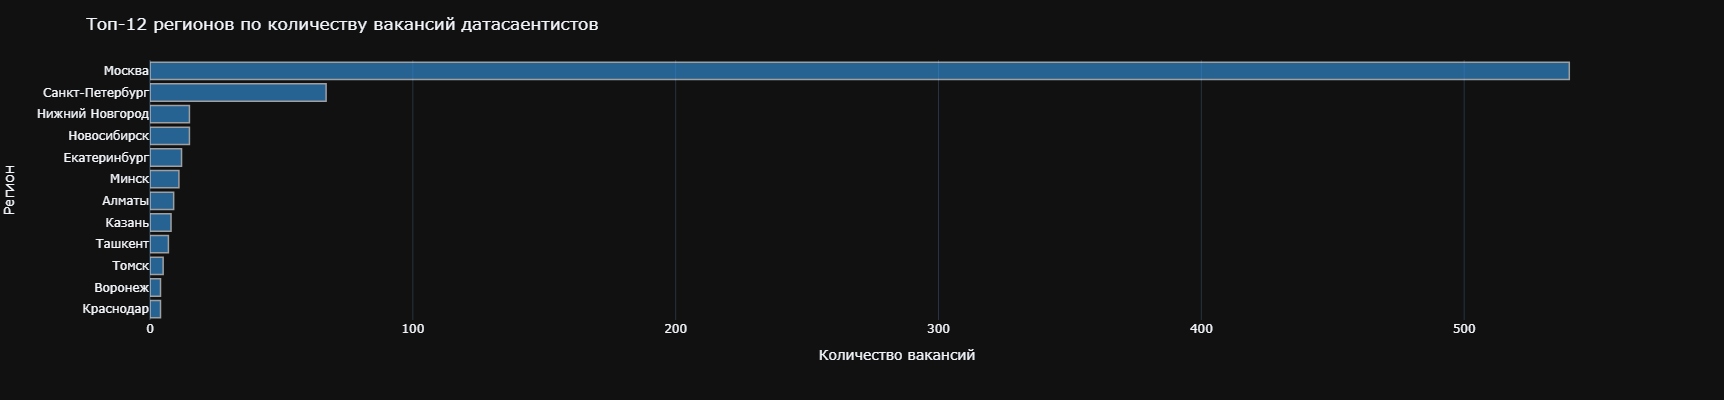

In [43]:
plot_discrete(
    'ds', 12, 'area',
    rus_feature='Регион',
    title_text='Топ-12 регионов по количеству вакансий датасаентистов',
    color='#3498E8',
    height=400
)

Москва и Санкт-Петербург неизменно занимают лидирующие позиции по объему предложений работы, подтверждая свой статус крупнейших трудовых центров. Отдельно стоит выделить ситуацию в Ташкенте, где количество вакансий для аналитиков данных превышает число предложений для датасаентистов в четыре раза, что является ярким свидетельством специфического спроса на рынке труда данного региона.

---

## Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.

Посмотрим распределены вакансии по количеству требуемого опыта

Общее количество вакансий аналитиков - 1162
Общее количество вакансий датасаентистов - 732


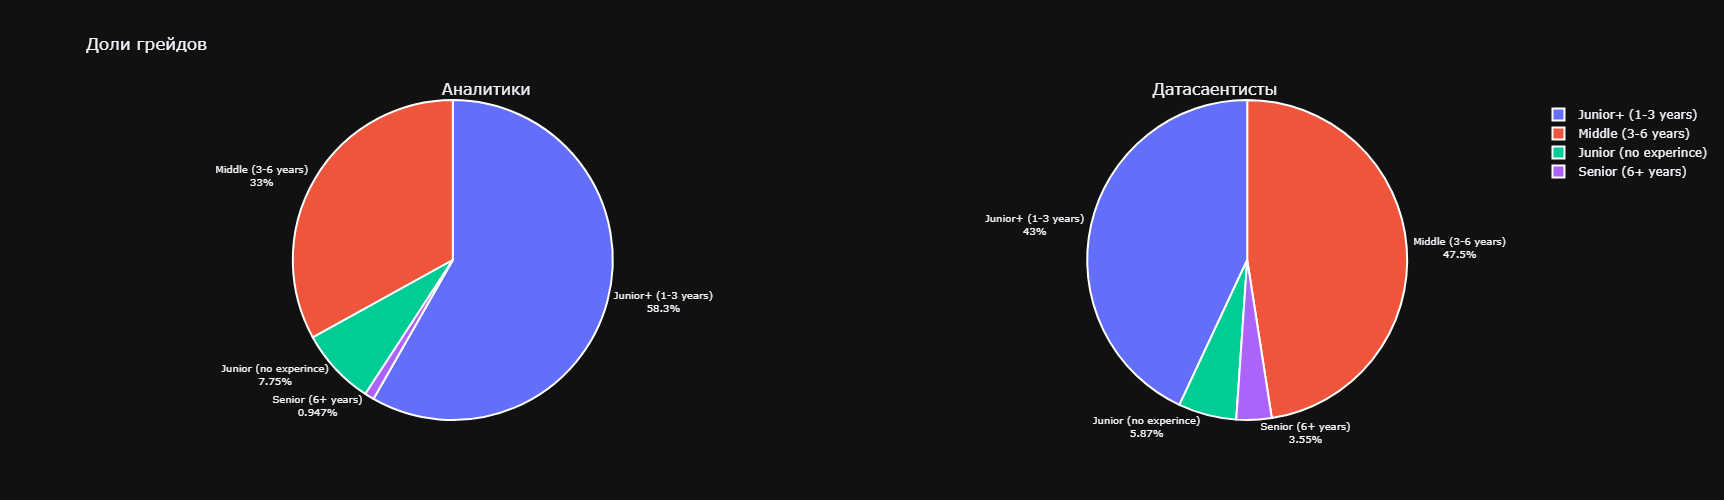

In [44]:
df_da = (vacancies[vacancies.name_type == 'da'].experience.value_counts().reset_index()
      .rename(columns={'experience': 'Опыт работы', 'count': 'Количество вакансий'}))
df_ds = (vacancies[vacancies.name_type == 'ds'].experience.value_counts().reset_index()
      .rename(columns={'experience': 'Опыт работы', 'count': 'Количество вакансий'}))
print(f'Общее количество вакансий аналитиков - {df_da["Количество вакансий"].sum()}')
print(f'Общее количество вакансий датасаентистов - {df_ds["Количество вакансий"].sum()}')
fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=("Аналитики", "Датасаентисты"), 
    specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(
    go.Pie(labels=df_da['Опыт работы'], 
           values=df_da['Количество вакансий'], 
           domain=dict(x=[0, 0.4])
          ))
fig.add_trace(go.Pie(labels=df_ds['Опыт работы'], values=df_ds['Количество вакансий'], domain=dict(x=[0.6, 1.0])))

fig.update_layout(
        height=500, width=1000, 
        title_text='Доли грейдов', 
        showlegend=True,
        template="plotly_dark",   
    )
fig.update_traces(textposition='outside', hoverinfo='label+value', 
                  textinfo='percent+label', textfont_size=10,
                  marker=dict(line=dict(color='#FFFFFF', width=2))
                 )
fig.show()

Анализ распределения грейдов показывает заметные различия между аналитиками и датасаентистами. В рядах аналитиков наибольшим спросом пользуются специалисты уровня Junior+, тогда как среди датасаентистов наиболее востребованы как Middle, так и Junior+ специалисты, которые совместно занимают лидирующие позиции. Кроме того, среди аналитиков наблюдается немного большая потребность в специалистах на уровне Junior без опыта по сравнению с датасаентистами. В то же время, среди вакансий для датасаентистов 3.5% приходится на Senior позиции, в то время как среди вакансий аналитиков доля Senior специалистов составляет менее 1%.

---

## Наиболее желаемые кандидаты на вакансии Аналитик данных и Специалист по Data Science

Посмотрим какие скиллы чаще всего хочет видеть работодатель у аналитиков, и у датасаентистов.

In [45]:
def get_frequency_skill(type_name: str, experience: str) -> pd.DataFrame:
    freq_skills = {}
    for sequence in vacancies[(vacancies.name_type == type_name) & (vacancies.experience == experience)].skills.to_list():
        skills = sequence.split(', ')
        if skills:
            for skill in skills:
                freq_skills[skill] = freq_skills.get(skill, 0) + 1
    freq_skills = dict(sorted(freq_skills.items(), key=lambda item: item[1], reverse=True))
    skill = list(freq_skills.keys())[:15]
    freq = list(freq_skills.values())[:15]
    return pd.DataFrame({'Скилл': skill, 'Частота встречаемости': freq}).sort_values(by='Частота встречаемости')

In [46]:
def plot_skills(data_da, data_ds, title):
    fig = make_subplots(
        rows=1, cols=2, 
        subplot_titles=("Аналитики", "Датасаентисты")
    )
    graph = px.bar(data_da, 'Частота встречаемости', 'Скилл', orientation='h', color_discrete_sequence=['#FF563A'])
    fig.add_trace(graph.data[0], row=1, col=1)
    
    graph = px.bar(data_ds, 'Частота встречаемости', 'Скилл', orientation='h', color_discrete_sequence=['#3498E8'])
    fig.add_trace(graph.data[0], row=1, col=2)
    
    fig.update_traces(marker_line_color='#FFFFFF',
                      marker_line_width=1.5, opacity=0.6)
    
    fig.update_layout(
        height=500, width=1000, 
        title_text=title, 
        showlegend=False,
        template="plotly_dark",       
    )
    fig.show()

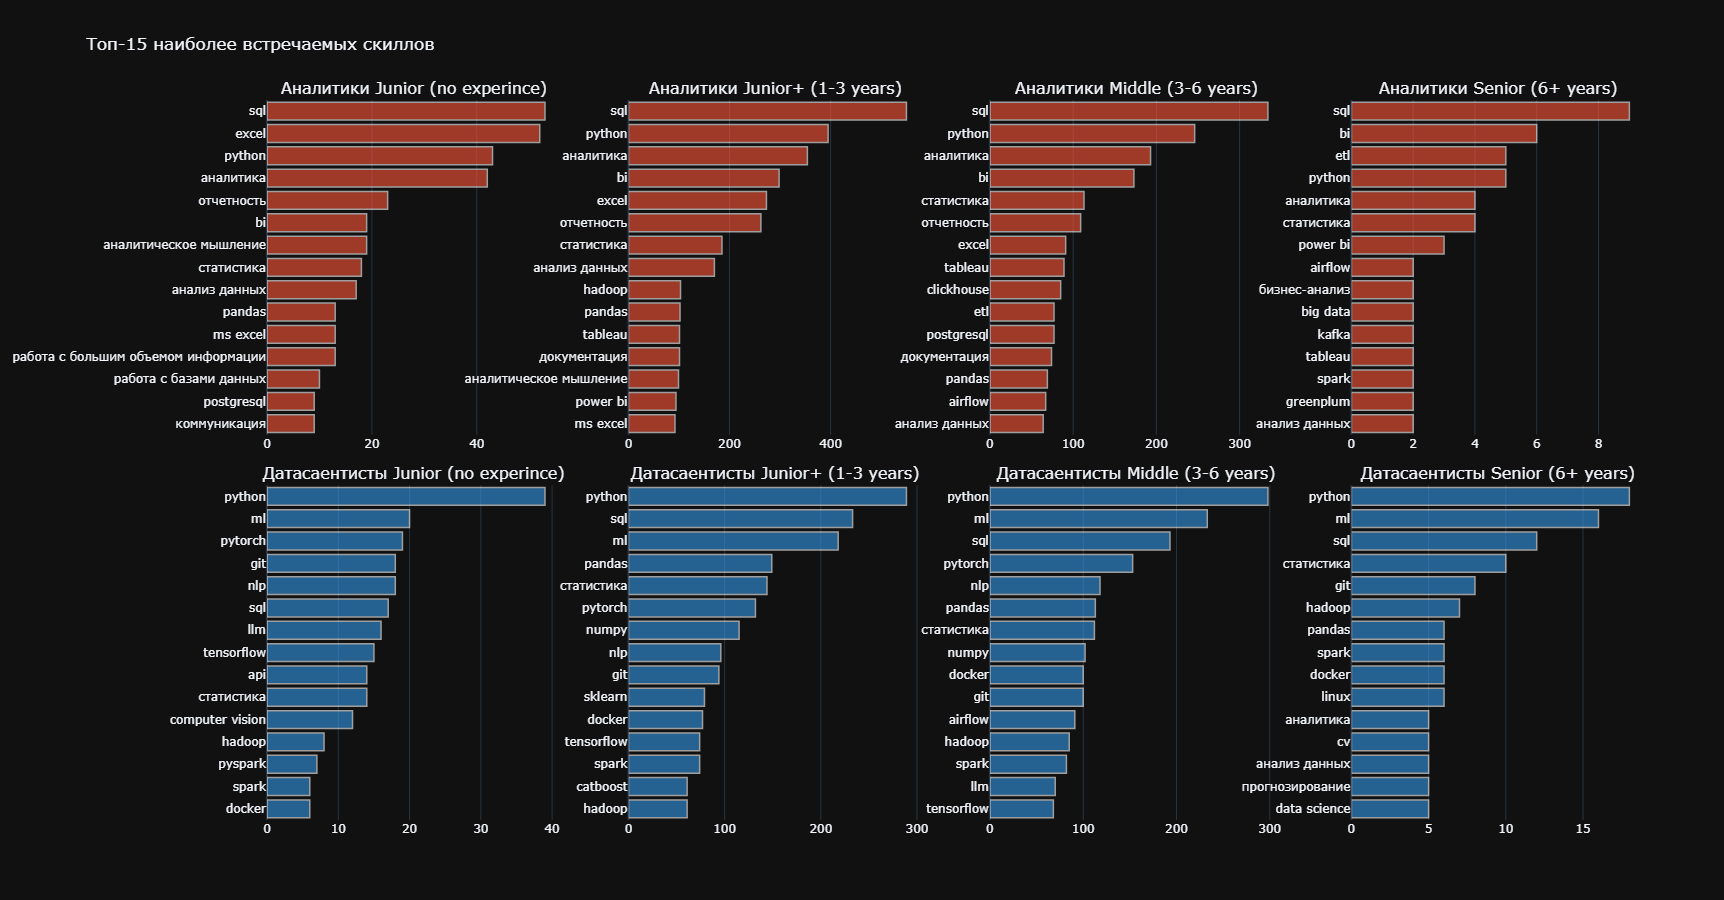

In [58]:
fig = make_subplots(
    rows=2, cols=4, 
    subplot_titles=("Аналитики Junior (no experince)", 
                    "Аналитики Junior+ (1-3 years)", 
                    "Аналитики Middle (3-6 years)", 
                    "Аналитики Senior (6+ years)", 
                    "Датасаентисты Junior (no experince)", 
                    "Датасаентисты Junior+ (1-3 years)", 
                    "Датасаентисты Middle (3-6 years)", 
                    "Датасаентисты Senior (6+ years)"),
    vertical_spacing=0.07
)
grades = ("Junior (no experince)", 
          "Junior+ (1-3 years)", 
          "Middle (3-6 years)", 
          "Senior (6+ years)")

for i, name_experience in enumerate(grades):    
    freq_skills_da = get_frequency_skill('da', name_experience)
    freq_skills_ds = get_frequency_skill('ds', name_experience)
    
    graph = px.bar(freq_skills_da, 'Частота встречаемости', 'Скилл', orientation='h', color_discrete_sequence=['#FF563A'])
    fig.add_trace(graph.data[0], row=1, col=i + 1)
    
    graph = px.bar(freq_skills_ds, 'Частота встречаемости', 'Скилл', orientation='h', color_discrete_sequence=['#3498E8'])
    fig.add_trace(graph.data[0], row=2, col=i + 1)

fig.update_traces(marker_line_color='#FFFFFF', 
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    height=900, width=1600, 
    title_text='Топ-15 наиболее встречаемых скиллов', 
    showlegend=False,
    template="plotly_dark",       
)
fig.show()

Изучение рынка вакансий показывает, что независимо от уровня и специализации, работодатели ценят знание SQL, Python и основ статистики у кандидатов. Для аналитиков на всех уровнях, кроме Senior, важен навык работы с Excel, тогда как для более опытных аналитиков этот инструмент уже не является приоритетным. Отличительной чертой для вакансий аналитиков является также умение работать с BI системами, такими как Power BI и Tableau. При переходе на уровень Middle аналитика, приобретает значение владение ETL процессами и инструментами, включая Airflow. Для Senior аналитиков ключевыми становятся знания Kafka, Spark и Greenplum.

Вакансии датасаентистов выделяются требованиями к специализированным навыкам в области машинного обучения, включая ML, PyTorch и NLP, а также востребованностью таких инструментов, как Docker и Spark. Кроме того, для специалистов Data Science на всех уровнях необходимо знание системы контроля версий Git.

---

## Определение типичного места работы для Аналитика данных и специалист по Data Science

---

In [102]:
vacancies['employer'].value_counts()[:20]

employer
СБЕР                         273
Ozon                          37
WILDBERRIES                   36
Банк ВТБ (ПАО)                34
Т1                            33
МТС                           28
Газпромбанк                   21
МАГНИТ, Розничная сеть        20
Ростелеком                    19
Райффайзен Банк               19
Samokat.tech                  18
ПСБ (ПАО «Промсвязьбанк»)     16
билайн                        13
Альфа-Банк                    13
Газпром нефть                 12
МегаФон                       12
Психограм                     12
Lamoda Tech                   11
Правительство Москвы          10
HuntIT                         9
Name: count, dtype: int64

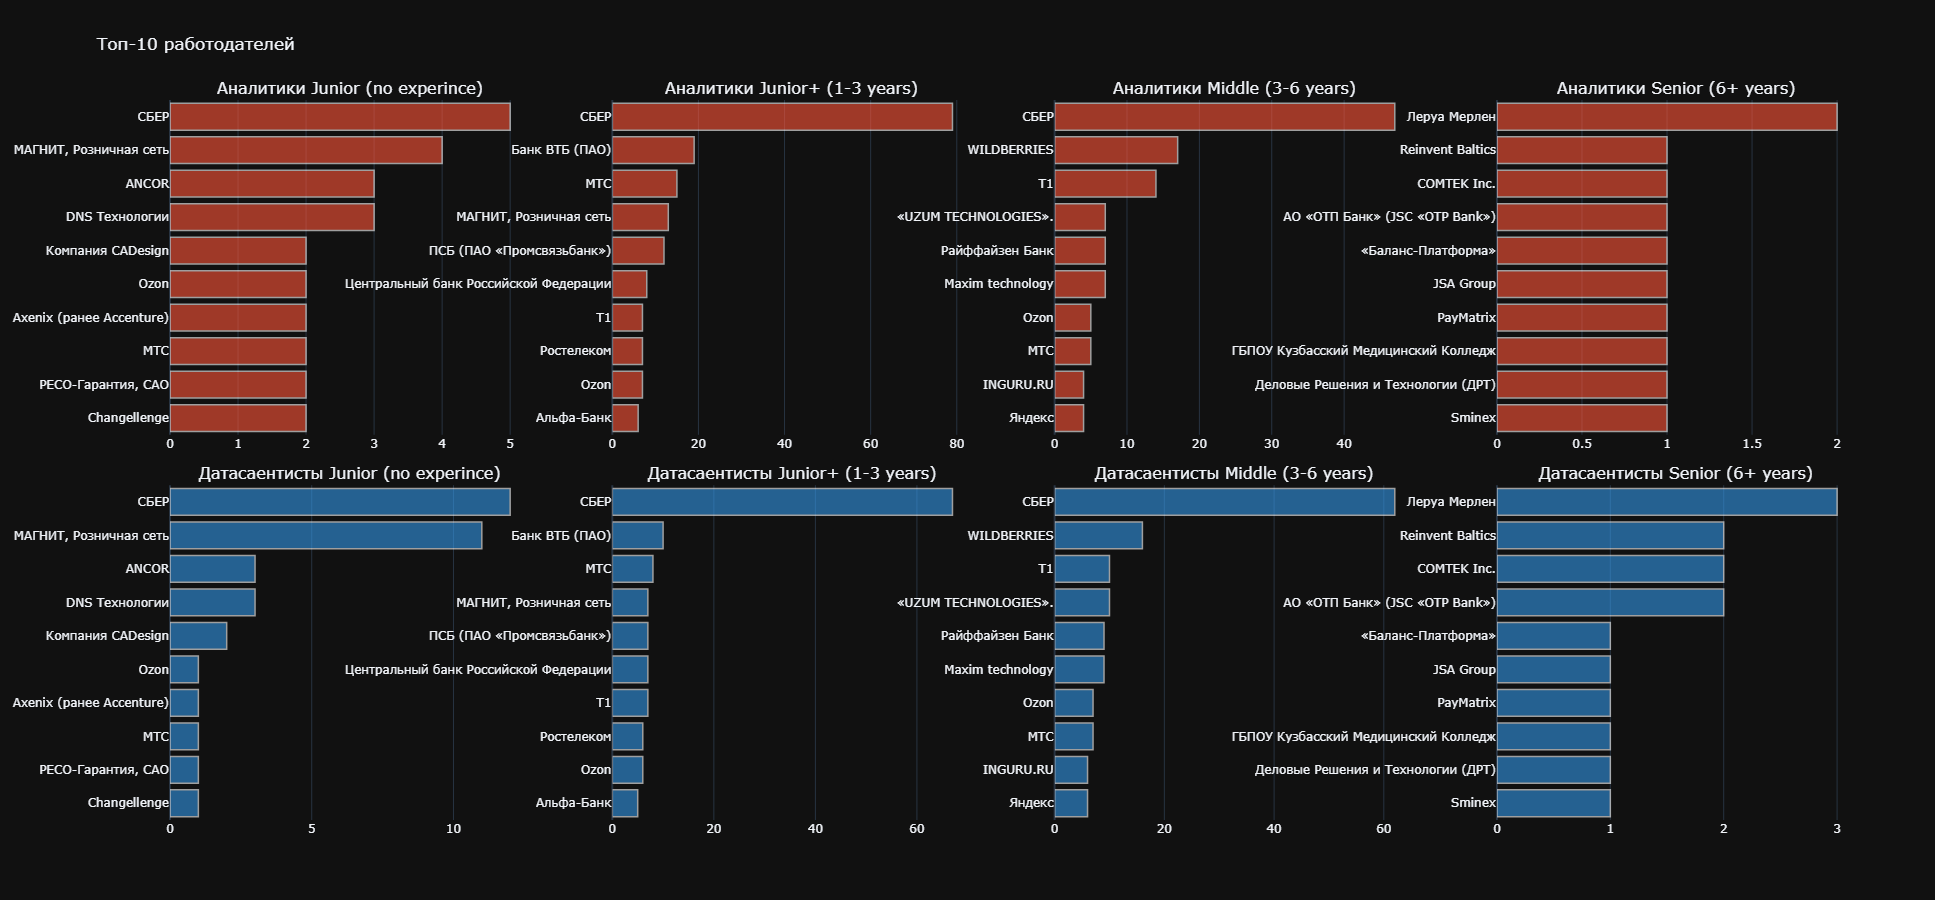

In [100]:
fig = make_subplots(
    rows=2, cols=4, 
    subplot_titles=("Аналитики Junior (no experince)", 
                    "Аналитики Junior+ (1-3 years)", 
                    "Аналитики Middle (3-6 years)", 
                    "Аналитики Senior (6+ years)", 
                    "Датасаентисты Junior (no experince)", 
                    "Датасаентисты Junior+ (1-3 years)", 
                    "Датасаентисты Middle (3-6 years)", 
                    "Датасаентисты Senior (6+ years)"),
    vertical_spacing=0.07
)
grades = ("Junior (no experince)", 
          "Junior+ (1-3 years)", 
          "Middle (3-6 years)", 
          "Senior (6+ years)")

for i, name_experience in enumerate(grades):    
    top_da = vacancies[(vacancies.name_type == 'da') & (vacancies.experience == name_experience)]['employer'].value_counts()[:10].sort_values()
    top_ds = vacancies[(vacancies.name_type == 'ds') & (vacancies.experience == name_experience)]['employer'].value_counts()[:10].sort_values()
    
    graph = px.bar(top_da, 'count', top_da.index, orientation='h', color_discrete_sequence=['#FF563A'])
    fig.add_trace(graph.data[0], row=1, col=i + 1)
    
    graph = px.bar(top_ds, 'count', top_da.index, orientation='h', color_discrete_sequence=['#3498E8'])
    fig.add_trace(graph.data[0], row=2, col=i + 1)

fig.update_traces(marker_line_color='#FFFFFF', 
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    height=900, width=1800, 
    title_text='Топ-10 работодателей', 
    showlegend=False,
    template="plotly_dark",       
)
fig.show()

Создадим столбец `frequency`, который будет показывать сколько раз встречалась подобная вакансия(с одинаковыми `employer`, `schedule`, `employment`, `name_type`, `experience`).

In [44]:
vacancies['frequency'] = (
     vacancies
         .groupby(['employer', 'schedule', 'employment', 'name_type', 'experience'])
         .name.transform('count') 
)

Создадим столбец `salary_group` который будет показывать медианную зарплату среди подобных вакансий, если зарплата не указана ни в одном из наблюдений группы, тогда в переменной будет nan.

In [45]:
vacancies['salary_group'] = (
    vacancies
        .groupby(['employer', 'schedule', 'employment', 'name_type', 'experience'])
        .salary_num.transform('median')
)

Оставим по одной вакансии из каждой группы.

In [48]:
raw_top = (
    vacancies
        .drop_duplicates(
            subset=['employer', 'schedule', 'employment', 'name_type', 'experience']
        )
        .sort_values(by='frequency', ascending=False))

In [49]:
def get_pivot_table(name_type: str, experience: str, amount=10):
    junior_da = (
        raw_top[(raw_top.name_type == name_type) & 
        (raw_top.experience == experience)]
        [['employer', 'schedule', 'employment', 'salary_group', 'frequency']]
        [:amount].reset_index(drop=True)
    )
    junior_da.rename(
        columns={'employer': 'Работодатель', 
                 'schedule': 'График работы', 
                 'employment': 'Тип занятости', 
                 'salary_group': 'Медианная зарплата', 
                 'frequency': 'Количество вакансий'},
        inplace=True
    )
    graid = pd.DataFrame(dict(zip(junior_da.columns, [[experience]] * 5)), index=['graid'])
    return pd.concat((junior_da, graid), axis=0).T.reset_index().set_index(['graid', 'index']).T

Выведем типичные места работы аналитика - Junior без опыта работы.

In [50]:
get_pivot_table('da', 'Junior (no experince)')

graid     Junior (no experince)                                  \
index              Работодатель График работы     Тип занятости   
0                          СБЕР   Полный день  Полная занятость   
1        МАГНИТ, Розничная сеть   Полный день  Полная занятость   
2                         ANCOR   Полный день  Полная занятость   
3                DNS Технологии   Полный день  Полная занятость   
4                  Changellenge   Полный день        Стажировка   
5      Axenix (ранее Accenture)   Полный день  Полная занятость   
6            РЕСО-Гарантия, САО   Полный день  Полная занятость   
7                ИПАК ЙУЛИ БАНК   Полный день  Полная занятость   
8                          Ozon   Полный день        Стажировка   
9             Компания CADesign   Полный день        Стажировка   

graid                                         
index Медианная зарплата Количество вакансий  
0                65500.0                   5  
1                82500.0                   4  
2               106000.0                   3  
3                60000.0                   3  
4                    NaN                   2  
5                    NaN                   2  
6                    NaN                   2  
7                    NaN                   1  
8                    NaN                   1  
9                    NaN                   1

Исходя из представленных данных, можно сделать вывод, что для начинающих аналитиков без опыта работы типичным предложением от работодателей является не только полная занятость, но и стажировка. Заработная плата на таких позициях обычно не превышает 100 тысяч рублей. В большинстве случаев предполагается полный рабочий день. Крупные компании, такие как СБЕР, МАГНИТ и ANCOR, активно вовлекают в процесс работы молодых специалистов, предоставляя им возможность развития и обучения в профессиональной среде.

In [51]:
get_pivot_table('da', 'Junior+ (1-3 years)')

graid                    Junior+ (1-3 years)                    \
index                           Работодатель     График работы   
0                                       СБЕР       Полный день   
1                             Банк ВТБ (ПАО)       Полный день   
2                                        МТС       Полный день   
3                     МАГНИТ, Розничная сеть  Удаленная работа   
4                  ПСБ (ПАО «Промсвязьбанк»)       Полный день   
5      Центральный банк Российской Федерации       Полный день   
6                                       Ozon       Полный день   
7                       Правительство Москвы       Полный день   
8                                 Альфа-Банк       Полный день   
9                            Райффайзен Банк       Полный день   

graid                                                           
index     Тип занятости Медианная зарплата Количество вакансий  
0      Полная занятость           105000.0                  79  
1      Полная занятость                NaN                  19  
2      Полная занятость            68500.0                  15  
3      Полная занятость                NaN                  10  
4      Полная занятость                NaN                   8  
5      Полная занятость                NaN                   8  
6      Полная занятость                NaN                   6  
7      Полная занятость                NaN                   6  
8      Полная занятость                NaN                   6  
9      Полная занятость                NaN                   6

In [177]:
get_pivot_table('da', 'Middle (3-6 years)')

graid Middle (3-6 years)                                      \
index       Работодатель     График работы     Тип занятости   
0                   СБЕР       Полный день  Полная занятость   
1                     Т1       Полный день  Полная занятость   
2            WILDBERRIES       Полный день  Полная занятость   
3       Maxim technology       Полный день  Полная занятость   
4        Райффайзен Банк       Полный день  Полная занятость   
5            WILDBERRIES  Удаленная работа  Полная занятость   
6                    МТС       Полный день  Полная занятость   
7                 Яндекс       Полный день  Полная занятость   
8                 HuntIT       Полный день  Полная занятость   
9                Playrix       Полный день  Полная занятость   

graid                                         
index Медианная зарплата Количество вакансий  
0                    NaN                  47  
1                    NaN                  13  
2                    NaN                  10  
3                    NaN                   7  
4                    NaN                   6  
5                    NaN                   5  
6                    NaN                   4  
7                    NaN                   4  
8                    NaN                   4  
9                    NaN                   4

In [180]:
get_pivot_table('da', 'Senior (6+ years)', 15)

graid                     Senior (6+ years)                    \
index                          Работодатель     График работы   
0            АО «ОТП Банк» (JSC «OTP Bank»)  Удаленная работа   
1                                 JSA Group       Полный день   
2                        «Баланс-Платформа»       Полный день   
3                              Леруа Мерлен  Удаленная работа   
4                              Леруа Мерлен       Полный день   
5                               COMTEK Inc.  Удаленная работа   
6                          Reinvent Baltics       Полный день   
7        Деловые Решения и Технологии (ДРТ)  Удаленная работа   
8                                    Sminex       Полный день   
9                                 PayMatrix  Удаленная работа   
10     ГБПОУ Кузбасский Медицинский Колледж       Полный день   

graid                                                           
index     Тип занятости Медианная зарплата Количество вакансий  
0      Полная занятость                NaN                   1  
1      Полная занятость                NaN                   1  
2      Полная занятость                NaN                   1  
3      Полная занятость                NaN                   1  
4      Полная занятость                NaN                   1  
5      Полная занятость             4500.0                   1  
6      Полная занятость                NaN                   1  
7      Полная занятость                NaN                   1  
8      Полная занятость                NaN                   1  
9      Полная занятость           135000.0                   1  
10     Полная занятость                NaN                   1

In [182]:
get_pivot_table('ds', 'Junior (no experince)')

graid  Junior (no experince)                                      \
index           Работодатель     График работы     Тип занятости   
0                  Психограм  Удаленная работа  Проектная работа   
1                       СБЕР       Полный день  Полная занятость   
2                       СБЕР       Полный день        Стажировка   
3       Правительство Москвы       Полный день  Полная занятость   
4                Lamoda Tech     Гибкий график  Полная занятость   
5                       Ozon       Полный день        Стажировка   
6                  Автомакон  Удаленная работа        Стажировка   
7               Samokat.tech  Удаленная работа        Стажировка   
8      Банк Русский Стандарт     Гибкий график        Стажировка   
9                 Альфа-Банк       Полный день  Полная занятость   

graid                                         
index Медианная зарплата Количество вакансий  
0                30000.0                  12  
1                75000.0                   6  
2                    NaN                   5  
3                    NaN                   3  
4                    NaN                   2  
5                    NaN                   1  
6                25000.0                   1  
7                    NaN                   1  
8                    NaN                   1  
9                    NaN                   1

In [183]:
get_pivot_table('ds', 'Junior+ (1-3 years)')

graid            Junior+ (1-3 years)                                      \
index                   Работодатель     График работы     Тип занятости   
0                               СБЕР       Полный день  Полная занятость   
1                     Банк ВТБ (ПАО)       Полный день  Полная занятость   
2                         Ростелеком  Удаленная работа  Полная занятость   
3      Сахалин - Остров Возможностей       Полный день  Полная занятость   
4                       Samokat.tech       Полный день  Полная занятость   
5                                ARK       Полный день  Полная занятость   
6                        Газпромбанк       Полный день  Полная занятость   
7                         Ингосстрах  Удаленная работа  Полная занятость   
8                        1221Системс  Удаленная работа  Полная занятость   
9                            МегаФон       Полный день  Полная занятость   

graid                                         
index Медианная зарплата Количество вакансий  
0                76000.0                  66  
1                    NaN                   8  
2               130000.0                   8  
3               350000.0                   7  
4                    NaN                   6  
5               165000.0                   6  
6                    NaN                   5  
7                    NaN                   5  
8                    NaN                   5  
9                    NaN                   4

In [184]:
get_pivot_table('ds', 'Middle (3-6 years)')

graid Middle (3-6 years)                                      \
index       Работодатель     График работы     Тип занятости   
0                   СБЕР       Полный день  Полная занятость   
1            WILDBERRIES       Полный день  Полная занятость   
2                   Ozon  Удаленная работа  Полная занятость   
3           Samokat.tech  Удаленная работа  Полная занятость   
4            Газпромбанк       Полный день  Полная занятость   
5                     Т1  Удаленная работа  Полная занятость   
6        Райффайзен Банк       Полный день  Полная занятость   
7                   Ozon       Полный день  Полная занятость   
8          Газпром нефть       Полный день  Полная занятость   
9            Lamoda Tech       Полный день  Полная занятость   

graid                                         
index Медианная зарплата Количество вакансий  
0               250000.0                  62  
1                    NaN                  10  
2                    NaN                  10  
3                    NaN                   9  
4                    NaN                   9  
5                    NaN                   6  
6                    NaN                   6  
7                    NaN                   6  
8                    NaN                   6  
9                    NaN                   5

In [200]:
get_pivot_table('ds', 'Senior (6+ years)', 30)

graid               Senior (6+ years)                                      \
index                    Работодатель     График работы     Тип занятости   
0                        Fundraise Up  Удаленная работа  Полная занятость   
1                                Sape       Полный день  Полная занятость   
2      РУСАЛ, Центр подбора персонала       Полный день  Полная занятость   
3                  БиАйЭй-Технолоджиз  Удаленная работа  Полная занятость   
4                             Selecty       Полный день  Полная занятость   
5                          Консалтика       Полный день  Полная занятость   
6                               Мокка       Полный день  Полная занятость   
7                         Beeline, ТМ  Удаленная работа  Полная занятость   
8                             Rubbles       Полный день  Полная занятость   
9                          Альфа-Банк       Полный день  Полная занятость   
10                             Appfox       Полный день  Полная занятость   
11                               СБЕР    Сменный график  Полная занятость   
12                               СБЕР       Полный день  Полная занятость   
13     АО «ОТП Банк» (JSC «OTP Bank»)     Гибкий график  Полная занятость   
14                          7RedLines  Удаленная работа  Полная занятость   
15                 Aramco Innovations       Полный день  Полная занятость   
16                          Гудфокаст       Полный день  Полная занятость   
17                            ГеймТек       Полный день  Полная занятость   
18                         РСХБ-Интех       Полный день  Полная занятость   
19                      Газпром нефть       Полный день  Полная занятость   
20                       Spice Agency       Полный день  Полная занятость   
21                            MERLION     Гибкий график  Полная занятость   

graid                                         
index Медианная зарплата Количество вакансий  
0                    NaN                   3  
1                    NaN                   2  
2                    NaN                   2  
3                    NaN                   1  
4                    NaN                   1  
5                    NaN                   1  
6                    NaN                   1  
7                    NaN                   1  
8               550000.0                   1  
9                    NaN                   1  
10              300000.0                   1  
11                   NaN                   1  
12                   NaN                   1  
13                   NaN                   1  
14              175000.0                   1  
15                   NaN                   1  
16                   NaN                   1  
17                   NaN                   1  
18                   NaN                   1  
19                   NaN                   1  
20                   NaN                   1  
21                   NaN                   1